# Converting to DateTime Type

In [1]:
import pandas as pd

pd.to_datetime('Jan 1 1970')

# to_datetime will convert a string into a time dtype



Timestamp('1970-01-01 00:00:00')

In [2]:
try:
    pd.to_datetime('Jan:1:1970')
except ValueError as e:
    print('ValueError', e)
    
## only if pandas understands the format

ValueError Unknown string format: Jan:1:1970


In [3]:
pd.to_datetime('Jan:1:1970', format='%b:%d:%Y')

# if you have a format pands does not recognize you can tell it what the format is 

Timestamp('1970-01-01 00:00:00')

In [7]:
df = pd.read_clipboard()
print(df.dtypes)
df.head()

date                   object
coffee_consumption    float64
dtype: object


,date,coffee_consumption
0,2019-01-01,14.301915
1,2019-01-02,12.905900
2,2019-01-03,10.046015
3,2019-01-04,6.354805
4,2019-01-07,8.545563


In [8]:
# convert our date column to datetime type
df.date = pd.to_datetime(df.date)
df.dtypes

date                  datetime64[ns]
coffee_consumption           float64
dtype: object

# Working with DateTime Series

In [9]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['day'] = df.date.dt.month
df['weekday'] = df.date.dt.day_name()
df.head()

# .dt can be called to identify a date time measurement of your choice

,date,coffee_consumption,year,month,day,weekday
0,2019-01-01,14.301915,2019,1,1,Tuesday
1,2019-01-02,12.905900,2019,1,1,Wednesday
2,2019-01-03,10.046015,2019,1,1,Thursday
3,2019-01-04,6.354805,2019,1,1,Friday
4,2019-01-07,8.545563,2019,1,1,Monday


In [10]:
# cleanup demonstration columns
del df['year']
del df['day']
del df['month']
del df['weekday']

# DateTime Indexes

In [11]:
df = df.set_index('date').sort_index()
df

# if you wish date can be used as the index on your df

## if you do this you MUST first ensure the date is in a correct format and sorted properly

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-07,8.545563


In [12]:
df.index.min(), df.index.max()

# check earliest and latest date

(Timestamp('2019-01-01 00:00:00'), Timestamp('2019-01-07 00:00:00'))

In [14]:
df['2019-01']

# you can use dates to access subsets of certain time periods

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-07,8.545563


In [15]:
df['2019-01-01':'2019-01-03'] # NB. inclusive

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015


# Changing the Period

In [16]:
by_day = df.asfreq('D')
by_day

# you can downsample to create observations for missing time

,coffee_consumption
date,
2019-01-01,14.301915
2019-01-02,12.905900
2019-01-03,10.046015
2019-01-04,6.354805
2019-01-05,NaN
2019-01-06,NaN
2019-01-07,8.545563


# Filling Missing Values

In [17]:
by_day.assign(
    ffill=lambda df: df.coffee_consumption.ffill(),
    bfill=lambda df: df.coffee_consumption.bfill()
).head(15)

# you can use lambda to fill missing values from data of previous to preceeding data points

,coffee_consumption,ffill,bfill
date,,,
2019-01-01,14.301915,14.301915,14.301915
2019-01-02,12.905900,12.905900,12.905900
2019-01-03,10.046015,10.046015,10.046015
2019-01-04,6.354805,6.354805,6.354805
2019-01-05,NaN,6.354805,8.545563
2019-01-06,NaN,6.354805,8.545563
2019-01-07,8.545563,8.545563,8.545563


In [18]:
df = df.fillna(0)

# alternatively you can fill NaNs with 0

# Resampling

In [19]:
df.resample('3W').mean() # Every 3 weeks

# you can resample by designated timeframe

,coffee_consumption
date,
2019-01-06,10.902159
2019-01-27,8.545563


In [20]:
df.resample('M').sum()

,coffee_consumption
date,
2019-01-31,52.154198


# Plotting

<AxesSubplot:xlabel='date'>

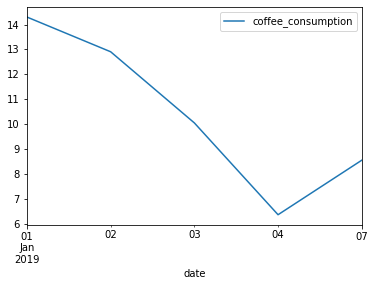

In [21]:
df.plot()

# you can plot using time series if it is the index

/usr/local/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1136: UserWarning: Attempting to set identical left == right == 588.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


<AxesSubplot:xlabel='date'>

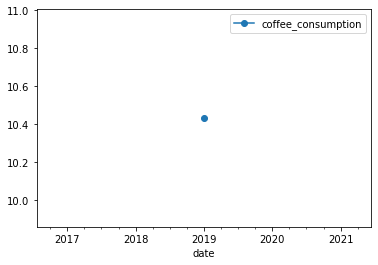

In [22]:
df.resample('3M').mean().plot(marker='o')

## you can also plot resampled data

# Rolling Windows

,coffee_consumption,rolling_3,rolling_5,rolling_7
date,,,,
2019-01-06,10.902159,NaN,NaN,NaN
2019-01-13,8.545563,NaN,NaN,NaN


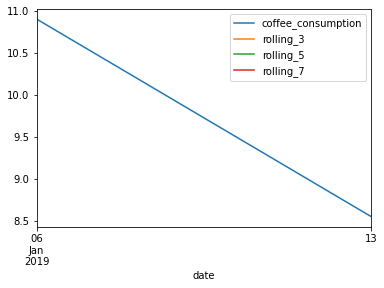

In [23]:
rolling_df = df.resample('W').mean().assign(
    rolling_3=lambda df: df.coffee_consumption.rolling(3).mean(),
    rolling_5=lambda df: df.coffee_consumption.rolling(5).mean(),
    rolling_7=lambda df: df.coffee_consumption.rolling(7).mean(),
)
rolling_df.plot()
rolling_df.head(20)

# rolling samples can be collected of designated time frames

In [24]:
df.resample('W').mean().rolling(4).sum()

# aggregate functions can be called on rolling averages

,coffee_consumption
date,
2019-01-06,NaN
2019-01-13,NaN


# Lagging and Lead

In [25]:
df['shift(-1)'] = df.coffee_consumption.shift(-1)
df['shift(1)'] = df.coffee_consumption.shift(1)
df['shift(3)'] = df.coffee_consumption.shift(3)
df['diff(1)'] = df.coffee_consumption.diff(1)
df['diff(3)'] = df.coffee_consumption.diff(3)
df.head(25)

# data can be shifted as desired

,coffee_consumption,shift(-1),shift(1),shift(3),diff(1),diff(3)
date,,,,,,
2019-01-01,14.301915,12.905900,NaN,NaN,NaN,NaN
2019-01-02,12.905900,10.046015,14.301915,NaN,-1.396015,NaN
2019-01-03,10.046015,6.354805,12.905900,NaN,-2.859885,NaN
2019-01-04,6.354805,8.545563,10.046015,14.301915,-3.691210,-7.947110
2019-01-07,8.545563,NaN,6.354805,12.905900,2.190758,-4.360337


In [26]:
# cleanup the additional columns
for col in ['shift(-1)', 'shift(1)', 'shift(3)', 'diff(1)', 'diff(3)']:
    del df[col]

# Strftime

In [27]:
df.index.strftime('%B %d, %Y')[:4]

# you can create custom date formats

Index(['January 01, 2019', 'January 02, 2019', 'January 03, 2019',
       'January 04, 2019'],
      dtype='object', name='date')

# Timezones

In [28]:
# tz_localize("America/Chicago") can assign a timezone if necessary 

# .tz_localize(None) can remove a timezone if need be

# .tz_convert can change a timezone 

# df.index.tz will tell you if a timezone is assigned 

# Timedeltas

In [29]:
start_date = pd.to_datetime('20190204')
graduation_date = pd.to_datetime('20190614')

days_between = graduation_date - start_date
days_between

# time deltas can be used to tell how much time has passed between 2 time points

Timedelta('130 days 00:00:00')

In [30]:
days_between // pd.Timedelta('1d')

130

In [31]:
df['days_since_max'] = (df.index.max() - df.index) // pd.Timedelta('1d')
df.tail(10)

,coffee_consumption,days_since_max
date,,
2019-01-01,14.301915,6
2019-01-02,12.905900,5
2019-01-03,10.046015,4
2019-01-04,6.354805,3
2019-01-07,8.545563,0


# Exercises

In [33]:
from vega_datasets import data
df = data.sf_temps()


In [34]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [35]:
df.shape

(8759, 2)

In [39]:
df = df.set_index('date').sort_index()
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


## 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [40]:
df.resample('D').mean() # Every 1 Day

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


## 2. Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

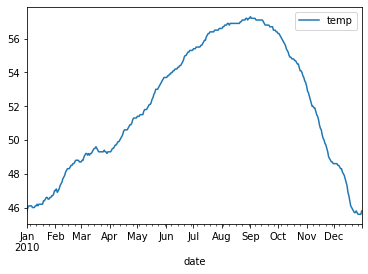

In [41]:
df.resample('D').min().plot() # Every 1 Day

## 3. Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

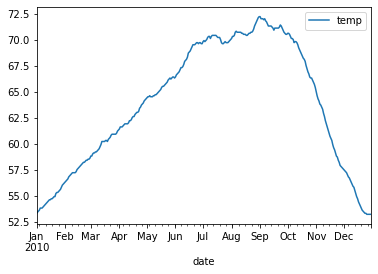

In [42]:
df.resample('D').max().plot() # Every 1 Day

## 4. Which month is the coldest, on average?

<AxesSubplot:xlabel='date'>

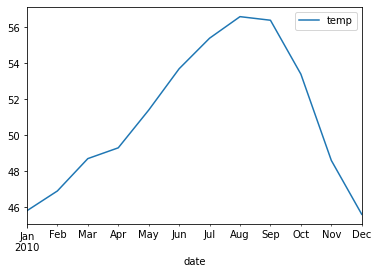

In [44]:
df.resample('M').min().plot() # Every 1 Month

In [45]:
df.resample('M').min()

# December appears to be the coldest month on average

,temp
date,
2010-01-31,45.8
2010-02-28,46.9
2010-03-31,48.7
2010-04-30,49.3
2010-05-31,51.4
2010-06-30,53.7
2010-07-31,55.4
2010-08-31,56.6
2010-09-30,56.4


## 5. Which month has the highest average temperature?

<AxesSubplot:xlabel='date'>

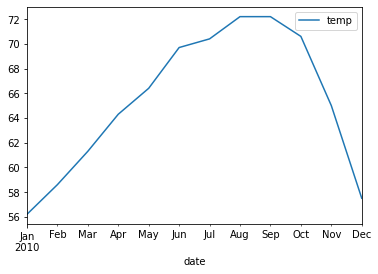

In [47]:
df.resample('M').max().plot() # Every 1 Month

In [48]:
df.resample('M').max()

# August and Spetember appear to be the warmest months

,temp
date,
2010-01-31,56.2
2010-02-28,58.6
2010-03-31,61.3
2010-04-30,64.3
2010-05-31,66.4
2010-06-30,69.7
2010-07-31,70.4
2010-08-31,72.2
2010-09-30,72.2


## 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [52]:
df_min_max = df.temp.resample('D').agg(['min', 'max'])

df_min_max.head()

,min,max
date,,
2010-01-01,45.8,53.3
2010-01-02,46.0,53.4
2010-01-03,46.1,53.5
2010-01-04,46.1,53.6
2010-01-05,46.1,53.8


In [57]:
df_min_max['range'] = df_min_max['max'] - df_min_max['min']

df_min_max.head()

,min,max,range
date,,,
2010-01-01,45.8,53.3,7.5
2010-01-02,46.0,53.4,7.4
2010-01-03,46.1,53.5,7.4
2010-01-04,46.1,53.6,7.5
2010-01-05,46.1,53.8,7.7


<AxesSubplot:xlabel='date'>

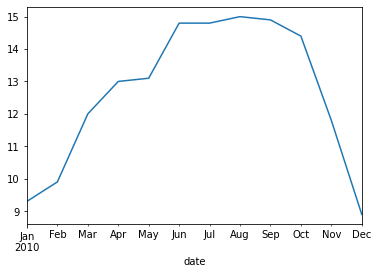

In [58]:
df_min_max.range.resample('M').max().plot() # Every 1 Month

In [59]:
df_min_max.range.resample('M').max()

# August had the highest range in temperature

date
2010-01-31     9.3
2010-02-28     9.9
2010-03-31    12.0
2010-04-30    13.0
2010-05-31    13.1
2010-06-30    14.8
2010-07-31    14.8
2010-08-31    15.0
2010-09-30    14.9
2010-10-31    14.4
2010-11-30    11.8
2010-12-31     8.9
Freq: M, Name: range, dtype: float64

## 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [62]:
df_bonus = df.temp.resample('D').agg(['min', 'max', 'mean'])

df_bonus.head()

,min,max,mean
date,,,
2010-01-01,45.8,53.3,49.170833
2010-01-02,46.0,53.4,49.304167
2010-01-03,46.1,53.5,49.391667
2010-01-04,46.1,53.6,49.445833
2010-01-05,46.1,53.8,49.491667


<AxesSubplot:xlabel='date'>

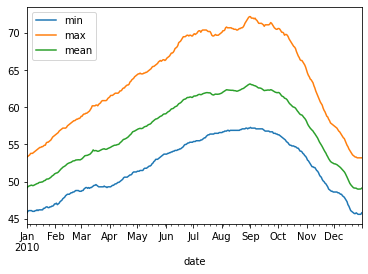

In [63]:
df_bonus.plot()

In [68]:
#########################################################################################################################

In [69]:
seattle = data.seattle_weather()

seattle.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [70]:
seattle = seattle.set_index('date').sort_index()
seattle.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


## 1. Which year and month combination has the highest amount of precipitation?

In [72]:
seattle1 = seattle.precipitation.resample('M').max()

seattle1

date
2012-01-31    27.7
2012-02-29    17.3
2012-03-31    27.4
2012-04-30    10.9
2012-05-31    18.5
2012-06-30    16.5
2012-07-31    15.2
2012-08-31     0.0
2012-09-30     0.3
2012-10-31    34.5
2012-11-30    54.1
2012-12-31    22.6
2013-01-31    38.4
2013-02-28     9.4
2013-03-31    11.9
2013-04-30    39.1
2013-05-31    13.7
2013-06-30     9.9
2013-07-31     0.0
2013-08-31    19.3
2013-09-30    43.4
2013-10-31     9.1
2013-11-30    30.0
2013-12-31    10.7
2014-01-31    21.6
2014-02-28    26.4
2014-03-31    46.7
2014-04-30    18.5
2014-05-31    33.3
2014-06-30     6.4
2014-07-31    19.3
2014-08-31    21.6
2014-09-30    20.3
2014-10-31    32.0
2014-11-30    34.3
2014-12-31    20.6
2015-01-31    26.2
2015-02-28    26.2
2015-03-31    55.9
2015-04-30    14.0
2015-05-31     6.1
2015-06-30     4.6
2015-07-31     2.0
2015-08-31    32.5
2015-09-30     5.8
2015-10-31    33.0
2015-11-30    47.2
2015-12-31    54.1
Freq: M, Name: precipitation, dtype: float64

In [73]:
seattle1.resample('Y').max()

# 2015 had the highest precipitation

date
2012-12-31    54.1
2013-12-31    43.4
2014-12-31    46.7
2015-12-31    55.9
Freq: A-DEC, Name: precipitation, dtype: float64

In [74]:
seattle1['2015-01-01':'2015-12-31'] # NB. inclusive

## March of 2015 had the highest precipitation

date
2015-01-31    26.2
2015-02-28    26.2
2015-03-31    55.9
2015-04-30    14.0
2015-05-31     6.1
2015-06-30     4.6
2015-07-31     2.0
2015-08-31    32.5
2015-09-30     5.8
2015-10-31    33.0
2015-11-30    47.2
2015-12-31    54.1
Freq: M, Name: precipitation, dtype: float64

## 2. Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

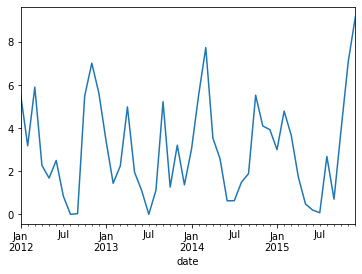

In [75]:
seattle.precipitation.resample('M').mean().plot()

## 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

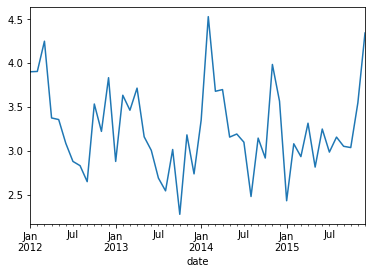

In [76]:
seattle.wind.resample('M').mean().plot()

## 4. Which year-month combination is the windiest?

In [77]:
seattle4 = seattle.wind.resample('M').max()

seattle4

date
2012-01-31    8.2
2012-02-29    8.1
2012-03-31    7.0
2012-04-30    8.0
2012-05-31    6.4
2012-06-30    6.4
2012-07-31    6.0
2012-08-31    4.7
2012-09-30    5.6
2012-10-31    7.3
2012-11-30    6.0
2012-12-31    9.5
2013-01-31    7.3
2013-02-28    8.1
2013-03-31    7.6
2013-04-30    6.4
2013-05-31    6.5
2013-06-30    5.7
2013-07-31    4.6
2013-08-31    4.6
2013-09-30    7.1
2013-10-31    6.3
2013-11-30    7.9
2013-12-31    8.8
2014-01-31    8.8
2014-02-28    7.9
2014-03-31    6.2
2014-04-30    5.8
2014-05-31    5.6
2014-06-30    5.0
2014-07-31    5.4
2014-08-31    4.1
2014-09-30    6.5
2014-10-31    5.4
2014-11-30    7.7
2014-12-31    6.7
2015-01-31    6.6
2015-02-28    6.6
2015-03-31    5.7
2015-04-30    6.5
2015-05-31    5.2
2015-06-30    5.0
2015-07-31    4.3
2015-08-31    5.8
2015-09-30    6.8
2015-10-31    7.2
2015-11-30    8.0
2015-12-31    7.6
Freq: M, Name: wind, dtype: float64

In [78]:
seattle4.resample('Y').max()

# 2012 had the highest wind

date
2012-12-31    9.5
2013-12-31    8.8
2014-12-31    8.8
2015-12-31    8.0
Freq: A-DEC, Name: wind, dtype: float64

In [79]:
seattle4['2012-01-01':'2012-12-31'] # NB. inclusive

## December of 2012 had the highest precipitation

date
2012-01-31    8.2
2012-02-29    8.1
2012-03-31    7.0
2012-04-30    8.0
2012-05-31    6.4
2012-06-30    6.4
2012-07-31    6.0
2012-08-31    4.7
2012-09-30    5.6
2012-10-31    7.3
2012-11-30    6.0
2012-12-31    9.5
Freq: M, Name: wind, dtype: float64

## 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [90]:
seattle[seattle['weather'] == 'sun'].resample('Y').count()

# 2014 appears to have been the sunniest year observed 

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-12-31,118,118,118,118,118
2013-12-31,205,205,205,205,205
2014-12-31,211,211,211,211,211
2015-12-31,180,180,180,180,180


## 6. In which month does it rain the most?

In [97]:
seattle[seattle['weather'] == 'rain'].resample('M').count()

## November of 2012 appears to be the rainiest month observed 

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-31,18,18,18,18,18
2012-02-29,17,17,17,17,17
2012-03-31,19,19,19,19,19
2012-04-30,19,19,19,19,19
2012-05-31,16,16,16,16,16
2012-06-30,19,19,19,19,19
2012-07-31,12,12,12,12,12
2012-08-31,2,2,2,2,2
2012-09-30,4,4,4,4,4


## 7. Which month has the most number of days with a non-zero amount of precipitation?

In [158]:
seattle[seattle['precipitation'] > 0].resample('M').max()

## December of 2012 is the month with the most non zero precipitation days

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-31,27.7,12.2,7.2,8.2,snow
2012-02-29,17.3,15.6,7.8,8.1,snow
2012-03-31,27.4,14.4,7.2,6.4,snow
2012-04-30,10.9,16.7,10.0,8.0,snow
2012-05-31,18.5,18.9,12.2,6.4,rain
2012-06-30,16.5,21.7,15.0,3.9,rain
2012-07-31,15.2,26.1,13.9,6.0,rain
2012-08-31,NaN,NaN,NaN,NaN,NaN
2012-09-30,0.3,20.0,13.9,5.0,rain


In [102]:
#########################################################################################################################

In [114]:
flights = data.flights_20k()

flights.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [115]:
flights = flights.set_index('date').sort_index()
flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,-8,251,MDW,STL
2001-01-01 07:00:00,-10,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


In [116]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20000 entries, 2001-01-01 00:01:00 to 2001-03-31 21:30:00
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   delay        20000 non-null  int64 
 1   distance     20000 non-null  int64 
 2   origin       20000 non-null  object
 3   destination  20000 non-null  object
dtypes: int64(2), object(2)
memory usage: 781.2+ KB


## 1. Convert any negative delays to 0.

In [117]:
flights['delay'] = flights['delay'].apply(lambda x : x if x > 0 else 0)

In [118]:
flights.head()

,delay,distance,origin,destination
date,,,,
2001-01-01 00:01:00,14,405,MCI,MDW
2001-01-01 06:20:00,0,491,BNA,MCI
2001-01-01 06:30:00,0,251,MDW,STL
2001-01-01 07:00:00,0,361,OAK,ONT
2001-01-01 07:00:00,0,303,MSY,HOU


## 2. Which hour of the day has the highest average delay?

In [122]:
flights['hour_of_day'] = flights.index.hour

In [123]:
flights.head()

,delay,distance,origin,destination,hour_of_day
date,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0
2001-01-01 06:20:00,0,491,BNA,MCI,6
2001-01-01 06:30:00,0,251,MDW,STL,6
2001-01-01 07:00:00,0,361,OAK,ONT,7
2001-01-01 07:00:00,0,303,MSY,HOU,7


In [128]:
flights.groupby('hour_of_day').delay.mean()

# 3am appears to be where the highest average delay occurs

hour_of_day
0     127.916667
1     170.000000
3     302.500000
5       0.513514
6       2.494856
7       3.071932
8       4.030483
9       5.002504
10      5.850953
11      7.361495
12      9.214341
13     11.453311
14     10.747320
15     13.137592
16     13.881068
17     13.199580
18     14.514218
19     16.256557
20     17.889778
21     21.626768
22     32.704607
23     65.353846
Name: delay, dtype: float64

## 3. Does the day of the week make a difference in the delay amount?

In [134]:
flights['day_of_week'] = flights.index.dayofweek

flights.head()

,delay,distance,origin,destination,hour_of_day,day_of_week
date,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,0
2001-01-01 06:20:00,0,491,BNA,MCI,6,0
2001-01-01 06:30:00,0,251,MDW,STL,6,0
2001-01-01 07:00:00,0,361,OAK,ONT,7,0
2001-01-01 07:00:00,0,303,MSY,HOU,7,0


In [131]:
flights.groupby('day_of_week').delay.mean()

# Thursday appears to be the day of the week with the highest amount of delays 

day_of_week
0     7.165772
1     9.410866
2    11.032478
3    12.821322
4    17.757596
5     8.431498
6    10.413542
Name: delay, dtype: float64

## 4. Does the month make a difference in the delay amount?

In [135]:
flights['month_of_year'] = flights.index.month

flights.head()

,delay,distance,origin,destination,hour_of_day,day_of_week,month_of_year
date,,,,,,,
2001-01-01 00:01:00,14,405,MCI,MDW,0,0,1
2001-01-01 06:20:00,0,491,BNA,MCI,6,0,1
2001-01-01 06:30:00,0,251,MDW,STL,6,0,1
2001-01-01 07:00:00,0,361,OAK,ONT,7,0,1
2001-01-01 07:00:00,0,303,MSY,HOU,7,0,1


In [136]:
flights.groupby('month_of_year').delay.mean()

# February appears to be the month with the highest amount of delays  

month_of_year
1    11.301592
2    12.306106
3     9.875287
Name: delay, dtype: float64

In [137]:
#########################################################################################################################

In [140]:
## Bonus

iowa = data.iowa_electricity()

iowa.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [141]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            51 non-null     datetime64[ns]
 1   source          51 non-null     object        
 2   net_generation  51 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


In [143]:
iowa = iowa.pivot(index='year', columns='source')

In [147]:
iowa.columns = ['fossil_fuels', 'nuclear_energy', 'renewables']

In [148]:
iowa.head()

,fossil_fuels,nuclear_energy,renewables
year,,,
2001-01-01,35361,3853,1437
2002-01-01,35991,4574,1963
2003-01-01,36234,3988,1885
2004-01-01,36205,4929,2102
2005-01-01,36883,4538,2724


## 1. For each row, calculate the percentage of the year's total that energy source provided.

In [153]:
iowa['total_energy'] = iowa.fossil_fuels + iowa.nuclear_energy + iowa.renewables

iowa

,fossil_fuels,nuclear_energy,renewables,total_energy,ff_pct,ne_pct,re_pct
year,,,,,,,
2001-01-01,35361,3853,1437,40651,86.986790,9.478242,3.534968
2002-01-01,35991,4574,1963,42528,84.628950,10.755267,4.615783
2003-01-01,36234,3988,1885,42107,86.052200,9.471109,4.476690
2004-01-01,36205,4929,2102,43236,83.738089,11.400222,4.861689
2005-01-01,36883,4538,2724,44145,83.549666,10.279760,6.170574
2006-01-01,37014,5095,3364,45473,81.397753,11.204451,7.397796
2007-01-01,41389,4519,3870,49778,83.147173,9.078308,7.774519
2008-01-01,42734,5282,5070,53086,80.499567,9.949893,9.550541
2009-01-01,38620,4679,8560,51859,74.471162,9.022542,16.506296


In [154]:
iowa['ff_pct'] = (iowa.fossil_fuels / iowa.total_energy) * 100
iowa['ne_pct'] = (iowa.nuclear_energy / iowa.total_energy) * 100
iowa['re_pct'] = (iowa.renewables / iowa.total_energy) * 100

iowa

,fossil_fuels,nuclear_energy,renewables,total_energy,ff_pct,ne_pct,re_pct
year,,,,,,,
2001-01-01,35361,3853,1437,40651,86.986790,9.478242,3.534968
2002-01-01,35991,4574,1963,42528,84.628950,10.755267,4.615783
2003-01-01,36234,3988,1885,42107,86.052200,9.471109,4.476690
2004-01-01,36205,4929,2102,43236,83.738089,11.400222,4.861689
2005-01-01,36883,4538,2724,44145,83.549666,10.279760,6.170574
2006-01-01,37014,5095,3364,45473,81.397753,11.204451,7.397796
2007-01-01,41389,4519,3870,49778,83.147173,9.078308,7.774519
2008-01-01,42734,5282,5070,53086,80.499567,9.949893,9.550541
2009-01-01,38620,4679,8560,51859,74.471162,9.022542,16.506296


## 2. Lineplot of generation over time, color by source